In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://gist.githubusercontent.com/raquelhr/d1324510056353feeccf111d6b186a0d/raw/7b3bccc7917f3baa7ec1d919195d120083ee75e9/proctatinium_data.csv"
import pandas as pd
data = pd.read_csv(url)
t_values = np.array(data["time"], dtype=float) 
count_values = np.array(data["count_rate"], dtype=float)

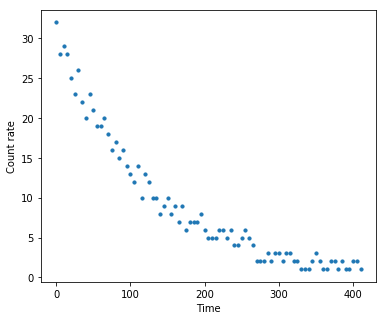

In [3]:
# Plot the data
plt.figure(figsize=(6, 5))
plt.scatter(t_values, count_values, s=10)
plt.xlabel('Time')
plt.ylabel('Count rate')
plt.show()


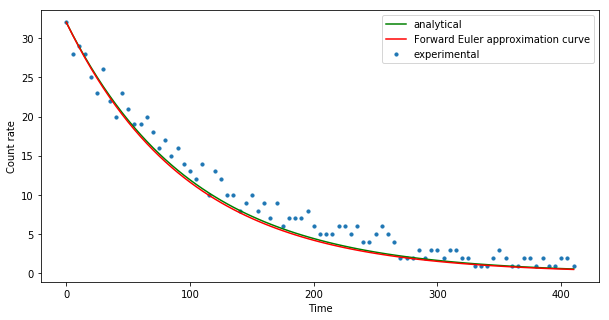

In [8]:
import math
time_step = 5
half_life = 1.17*60
lambda_param = math.log(2)/(half_life)
N0 = data['count_rate'][0]


# analytical solution
analytical_N = []
times = [t for t in range(0, 415, 5)]
for t in times:
    analytical_N.append(N0*np.exp(-lambda_param*t))
    
    
# Forward Euler method
predicted_N = [N0]
times = [t for t in range(0, 415, 5)]
for t in times[:-1]:
    predicted_N.append(predicted_N[-1]+time_step*(-lambda_param*predicted_N[-1]))

plt.figure(figsize=(10, 5))
plt.scatter(t_values, count_values, s=10, label = 'experimental')
plt.plot(times, analytical_N, c='g', label = 'analytical')
plt.plot(times, predicted_N, c='r', label = 'Forward Euler approximation curve')

plt.xlabel('Time')
plt.ylabel('Count rate')
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import mean_squared_error 

# comparing analytical results with experimental results
print(mean_squared_error(analytical_N,count_values)/len(analytical_N)*100)
# comparing theoretical results with numerical results
print(mean_squared_error(analytical_N,predicted_N)/len(analytical_N)*100)


3.2623176801222495
0.04669567318630049


0.00036472709496883875


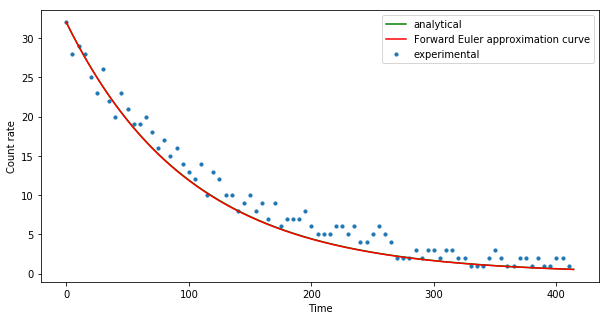

In [10]:
# time step is one instead
analytical_N = []
times = [t for t in range(0, 415, 1)]
for t in times:
    analytical_N.append(N0*np.exp(-lambda_param*t))
    
time_step = 1
predicted_N_step1 = [N0]
times = [t for t in range(0, 415, 1)]
for t in times[:-1]:
    predicted_N_step1.append(predicted_N_step1[-1]+time_step*(-lambda_param*predicted_N_step1[-1]))
    

print(mean_squared_error(analytical_N,predicted_N_step1)/len(analytical_N)*100)


plt.figure(figsize=(10, 5))
plt.scatter(t_values, count_values, s=10, label = 'experimental')
plt.plot(times, analytical_N, c='g', label = 'analytical')
plt.plot(times, predicted_N_step1, c='r', label = 'Forward Euler approximation curve')

plt.xlabel('Time')
plt.ylabel('Count rate')
plt.legend()
plt.show()